In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# 1. Explore (un)scaled data

## 1.1. Create dataframes

In [56]:
# train_feat= pd.read_csv('train_features.csv', index_col=0)
# test_feat= pd.read_csv('test_features.csv', index_col=0)
# all_feat = pd.concat([train_feat, test_feat])
courseinfo = pd.read_csv('course_info.csv', index_col='id')
user_profile = pd.read_csv('user_info.csv', index_col='user_id')
user_profile
courseinfo

/Users/matteorusso/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,course_id,start,end,course_type,category
id,,,,,
6561,course-v1:CPVS+CPVS-HDLSC001+20160901,2016-11-16 08:00:00,2016-12-31 23:30:00,0,NaN
5557,course-v1:SCUT+144282+201709,2016-09-01 00:00:00,2017-02-28 00:00:00,0,NaN
9433,course-v1:ZK+06093+J,2018-01-01 08:00:00,2020-01-01 00:00:00,0,NaN
8320,course-v1:nuist+001+2016-T1,2017-03-01 18:30:00,2017-07-01 23:30:00,0,NaN
231,FUDAN/CFD004/2014.9-2015.1,2014-09-10 08:00:00,2015-09-10 00:00:00,0,NaN
...,...,...,...,...,...
10493,course-v1:NBUX+lzu_MH001x+2017_T1,2017-04-10 00:00:00,2017-05-21 23:59:00,0,NaN
11058,course-v1:Train+Train12+2017_T1,2017-05-01 08:00:00,2017-05-31 00:00:00,0,NaN
4184,course-v1:nttec+10610204+2015_T2,2015-12-07 00:00:00,2016-12-07 00:00:00,0,NaN


In [57]:
en_categories = ['math','physics','electrical', 'computer','foreign language', 'business', 'economics','biology','medicine','literature','philosophy','history','social science', 'art','engineering','education','environment','chemistry']
course_category_map = dict(zip(range(len(en_categories)), en_categories))
course_category_map

{0: 'math',
 1: 'physics',
 2: 'electrical',
 3: 'computer',
 4: 'foreign language',
 5: 'business',
 6: 'economics',
 7: 'biology',
 8: 'medicine',
 9: 'literature',
 10: 'philosophy',
 11: 'history',
 12: 'social science',
 13: 'art',
 14: 'engineering',
 15: 'education',
 16: 'environment',
 17: 'chemistry'}

- **Unscaled data will always be prefized by 'u_'**
- **Scaled data will be the same as unscaled without any prefix**

In [58]:
u_train_feat_df = pd.read_csv('u_train_feat.csv')
u_test_feat_df = pd.read_csv('u_test_feat.csv')
u_all_feat_df = pd.concat([u_train_feat_df, u_test_feat_df])

In [59]:
u_all_feat_df

,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,...,truth,username,course_id,age,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
0,772,2,2,0,0,0,0,0,0,0,...,1,5981,course-v1:TsinghuaX+70800232X+2015_T2,29,1,3,6,1333,2,14
1,773,21,21,6,4,3,0,1,0,0,...,1,1544995,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,2,1333,2,14
2,774,74,74,9,14,10,1,8,0,0,...,1,1072798,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,5,1333,2,14
3,776,19,19,0,3,3,1,2,0,0,...,0,561867,course-v1:TsinghuaX+70800232X+2015_T2,37,2,6,6,1333,2,14
4,777,4,4,0,0,0,0,0,0,0,...,1,1368125,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,11,1333,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67694,393203,4,4,0,0,1,0,1,0,0,...,1,29394,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,28,2,3,6,735,2,5
67695,393204,4,4,0,0,1,0,1,0,0,...,1,3238122,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,0,0,0,4,735,2,5
67696,131061,2,2,0,0,0,0,0,0,0,...,1,1103805,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,0,0,0,3,687,2,15
67697,131065,6,6,0,0,0,0,1,0,0,...,1,79648,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,31,1,1,6,687,2,15


In [60]:
train_feat_df = pd.read_csv('train_feat.csv')
test_feat_df = pd.read_csv('test_feat.csv')
all_feat_df = pd.concat([train_feat_df, test_feat_df])

In [61]:
all_feat_df.columns

Index(['enroll_id', 'all#count', 'session#count', 'seek_video#num',
       'play_video#num', 'pause_video#num', 'stop_video#num', 'load_video#num',
       'problem_get#num', 'problem_check#num', 'problem_save#num',
       'reset_problem#num', 'problem_check_correct#num',
       'problem_check_incorrect#num', 'create_thread#num',
       'create_comment#num', 'delete_thread#num', 'delete_comment#num',
       'click_info#num', 'click_courseware#num', 'click_about#num',
       'click_forum#num', 'click_progress#num', 'close_courseware#num',
       'truth', 'username', 'course_id', 'age', 'gender', 'education',
       'user_enroll_num', 'course_enroll_num', 'cluster_label',
       'course_category'],
      dtype='object')

## 1.2. Preliminary statistics

### Dropout by age, course category, education level 

In [62]:
# Age statistics
tot_age_counts = u_all_feat_df.groupby(['age']).size().reset_index(name='counts')
tot_age = []
idx = 0
for a in list(tot_age_counts.age):
    if a != 66:
        tot_age.append(list(tot_age_counts.counts)[idx])
    idx+=1
tot_age = tot_age[1:]
age_counts = u_all_feat_df.groupby(['age', 'truth']).size().reset_index(name='counts')
drop_age = age_counts[age_counts['truth'] == 1]
drop_age = drop_age.iloc[1:, :]
drop_age['proportion'] = drop_age['counts']/tot_age
drop_age

,age,truth,counts,proportion
2,10,1,2,1.000000
4,11,1,5,0.833333
6,12,1,6,0.545455
8,13,1,1,0.333333
10,14,1,25,0.641026
12,15,1,11,0.785714
14,16,1,71,0.739583
16,17,1,59,0.766234
18,18,1,193,0.656463
20,19,1,417,0.638591


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

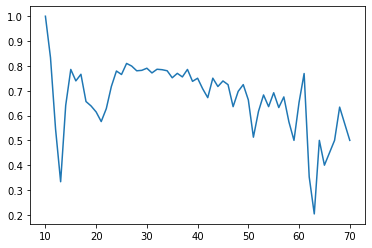

In [63]:
plt.plot(drop_age['age'], drop_age['proportion'])
plt.xlabel()

# 2 Predictions

## 2.1 Traditional time-series models

In [67]:
# Filter by specified course_id
def users_activity_course(courseid):
    course_activity_df = train[train['course_id'] == courseid]
    course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])
    course_activity_df = course_activity_df.groupby(['username', 'time']).size().reset_index(name='counts')
    return course_activity_df

In [64]:
train = pd.read_csv('prediction_log/train_log.csv')

In [65]:
test = pd.read_csv('prediction_log/test_log.csv')

In [66]:
all_data = pd.concat([train, test])

### Plot the whole dataset

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


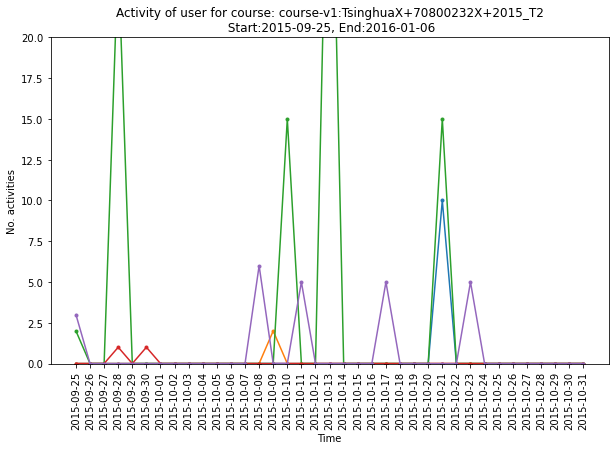

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


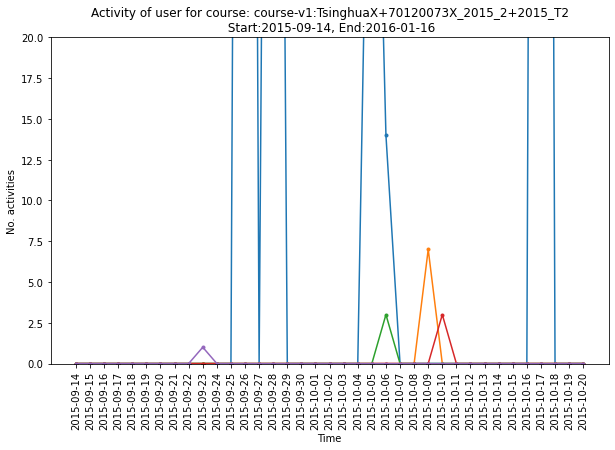

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


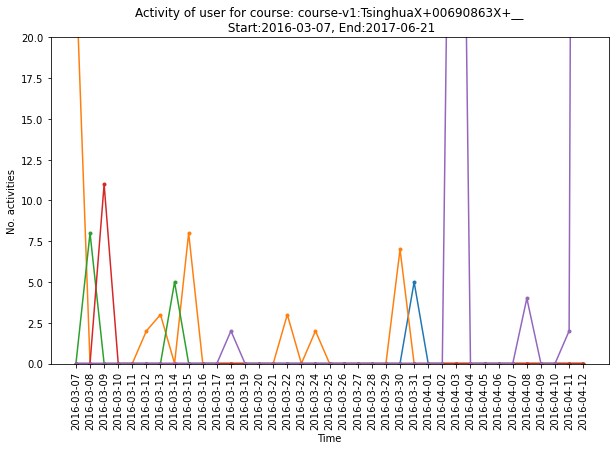

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


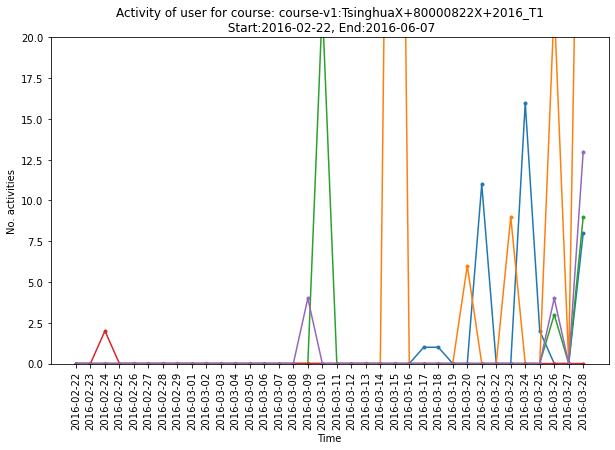

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


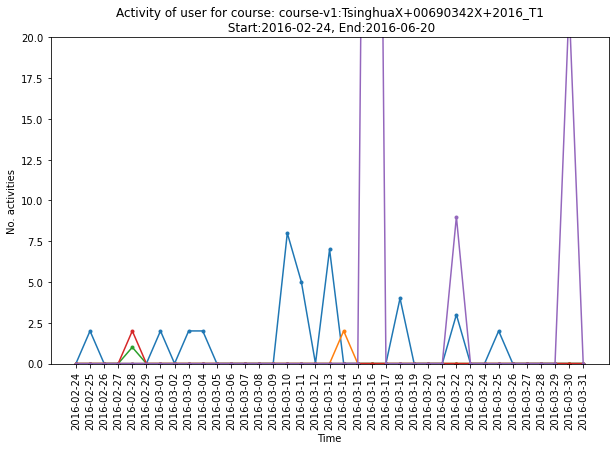

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


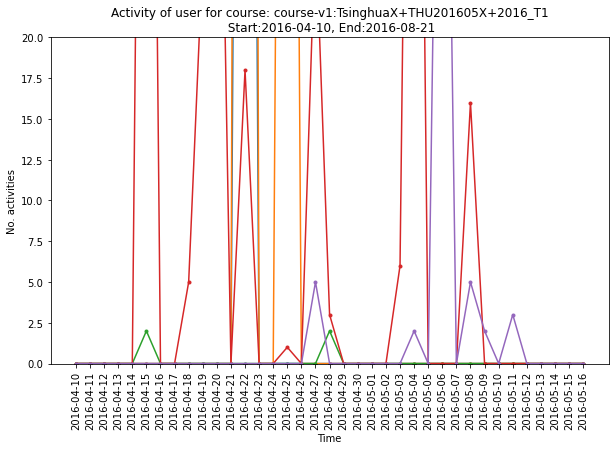

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


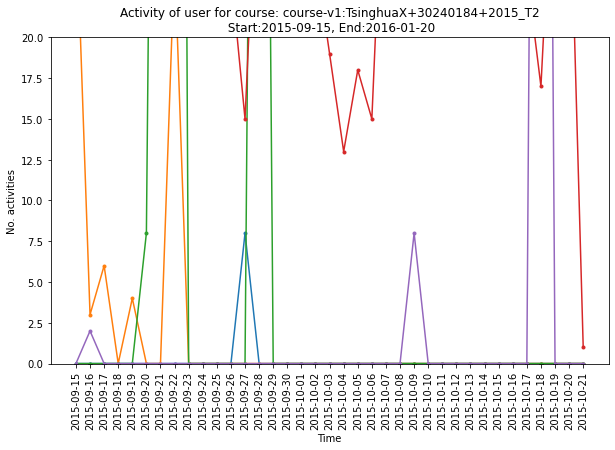

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


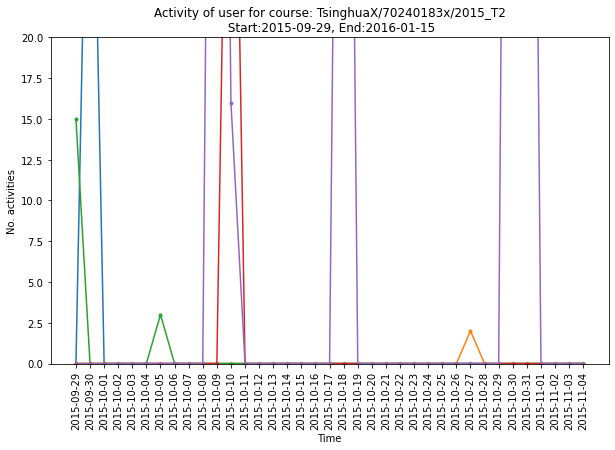

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


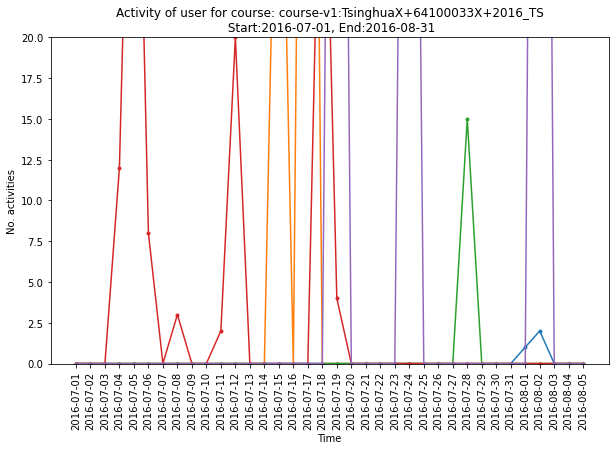

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


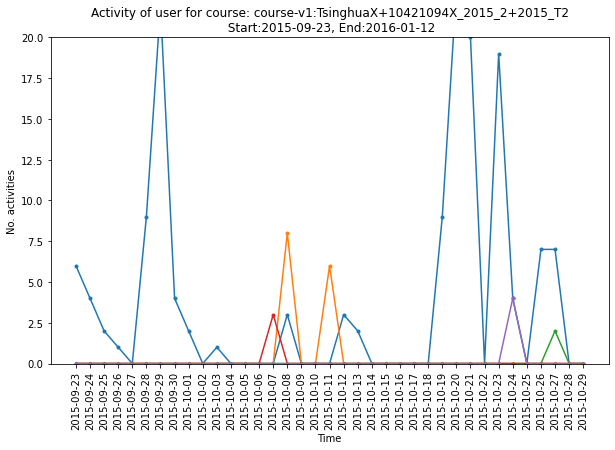

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


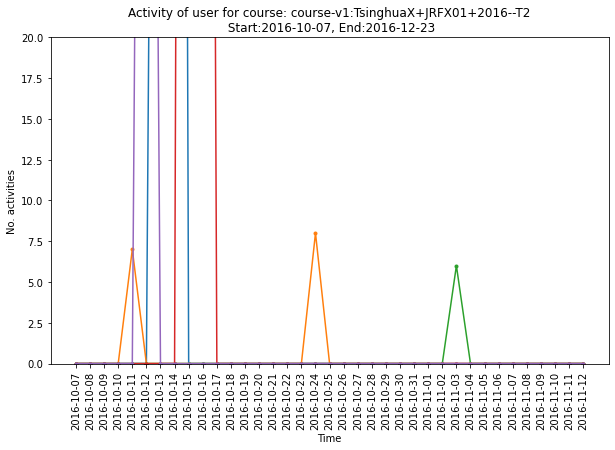

KeyboardInterrupt: 

In [68]:
plot_flag=True
# course information
all_courses = all_data.course_id.drop_duplicates()
for courseid in all_courses:
    start_date = courseinfo[courseinfo['course_id'] == courseid].start.values[0][:-9]
    end_date = courseinfo[courseinfo['course_id'] == courseid].end.values[0][:-9]
    course_activity_df = users_activity_course(courseid)
    if course_activity_df.shape[0] != 0:
        # pivot the data into the correct shape
        df = course_activity_df.pivot(index='time', columns='username', values='counts').T.head(5)
        df.fillna(0, inplace=True)
        # Plot
        if plot_flag:
            title = 'Activity of user for course: ' + courseid + '\n Start:' + start_date + ', End:' + end_date
            ax = df.T.plot(style='.-', figsize=(10, 6), legend=False, title=title) #marker='.',
            ax.set_xlabel("Time")
            ax.set_ylabel("No. activities")
            ax.set_xticks(range(len(df.columns)))
            ax.set_xticklabels(df.columns, rotation=90)
            ax.set_ylim([0, 20])
            plt.show()

### 2.1.1 Create suitable pivot tables and save them

**CAUTION: Skip until the loading part if you do not want to wait long!**

In [69]:
def build_pivot_datasets(train_set, test_set):
    # course information fr each user in training set
    courses_train = train_set.course_id.drop_duplicates()
    for courseid in courses_train:
        start_date = courseinfo[courseinfo['course_id'] == courseid].start.values[0][:-9]
        end_date = courseinfo[courseinfo['course_id'] == courseid].end.values[0][:-9]
        train_course_activity_df = users_activity_course(courseid)
        if train_course_activity_df.shape[0] != 0:
            # pivot the data into the correct shape
            train_df = train_course_activity_df.pivot(index='time', columns='username', values='counts').T
            train_df.fillna(0, inplace=True)
    # repeat for test set
    courses_test = test_set.course_id.drop_duplicates()
    for courseid in courses_test:
        start_date = courseinfo[courseinfo['course_id'] == courseid].start.values[0][:-9]
        end_date = courseinfo[courseinfo['course_id'] == courseid].end.values[0][:-9]
        test_course_activity_df = users_activity_course(courseid)
        if test_course_activity_df.shape[0] != 0:
            # pivot the data into the correct shape
            test_df = test_course_activity_df.pivot(index='time', columns='username', values='counts').T
            test_df.fillna(0, inplace=True)
    # return pivot tables
    return train_df, test_df

In [70]:
train_df, test_df = build_pivot_datasets(train, test)

<ipython-input-67-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


In [73]:
# Save pivot tables
train_df.to_csv('pivot/train_pivot.csv')
test_df.to_csv('pivot/test_pivot.csv')

### 2.1.2 Load pivot datasets

In [74]:
train_pivot = pd.read_csv('pivot/train_pivot.csv')
test_pivot = pd.read_csv('pivot/test_pivot.csv')

### 2.1.3 Forecasts with Prophet

The prophet library is imported from https://facebook.github.io/prophet/

Please consult the following for the implementation: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [77]:
# Uncomment for installation
# !pip install pystan==2.19.1.1
# !pip install prophet

     |████████████████████████████████| 37.4 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.3 MB/s eta 0:00:011
     |████████████████████████████████| 49 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 14.4 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/matteorusso/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/12/t3cy8f4j65s6jvh5172842gw0000gn/T/pip-install-lunrpfsu/prophet/setup.py'"'"'; __file__='"'"'/private/var/folders/12/t3cy8f4j65s6jvh5172842gw0000gn/T/pip-install-lunrpfsu/prophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__

    Running setup.py install for prophet ... done


In [96]:
from prophet import Prophet

In [97]:
single_user = pd.DataFrame(train_pivot.iloc[0])
username = int(single_user.iloc[0])
single_user = single_user.iloc[1: , :]
single_user.reset_index(level=0, inplace=True)
single_user.columns = ['ds', 'y']
#single_user

In [98]:
model = Prophet()
model.fit(single_user)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
future = model.make_future_dataframe(periods=4)

In [105]:
single_user.tail()

,ds,y
32,2016-04-02,0.0
33,2016-04-03,0.0
34,2016-04-04,0.0
35,2016-04-05,0.0
36,2016-04-06,0.0


In [106]:
future.tail()

,ds
36,2016-04-06
37,2016-04-07
38,2016-04-08
39,2016-04-09
40,2016-04-10


In [107]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
36,2016-04-06,2.898627,-5.763567,10.995697
37,2016-04-07,2.670779,-5.501350,11.615645
38,2016-04-08,12.361537,3.864068,20.474737
39,2016-04-09,2.670785,-5.584263,11.116993
40,2016-04-10,2.670788,-6.177896,11.313613


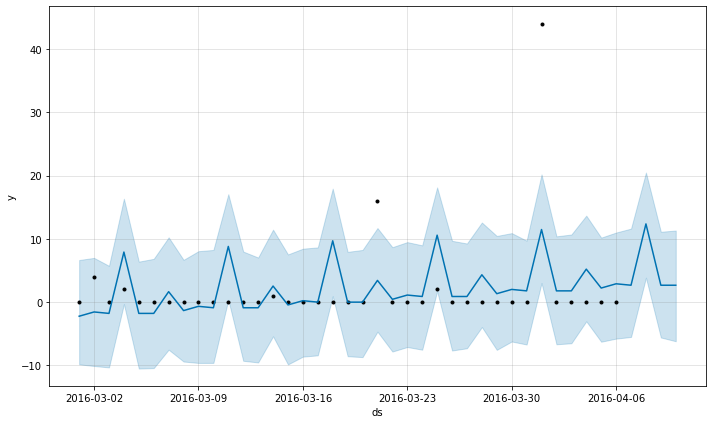

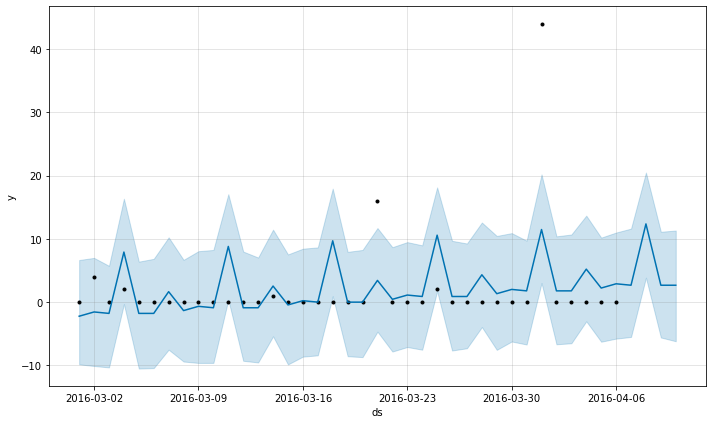

In [108]:
model.plot(forecast)